In [31]:
import numpy as np
import sentencepiece as spm

from scipy import stats

import spacy

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from examples.speech_to_text.data_utils import load_df_from_tsv

In [2]:
langs = ["fr", "de", "es", "it", "ru", "pt", "zh-CN", "pt", "fa", "et", "mn", "tr", "ar", "sv-SE", "lv", "sl", "nl", "ta", "ja", "id"]

In [3]:
dfs = [load_df_from_tsv('/mnt/data/siqiouyang/datasets/covost2/{}/train_st_{}_en.tsv'.format(lang, lang)) for lang in langs]

In [4]:
# sp = spm.SentencePieceProcessor()
# sp.Load('/mnt/data/siqiouyang/runs/mST/pretrained/mbart50.ft.n1/sentence.bpe.model')
# n_word = sp.vocab_size()

In [17]:
nlp = spacy.lang.en.English()

In [5]:
refs = [df['tgt_text'].tolist() for df in dfs]

In [24]:
tok_refs = []
tok2id = {}
for ref in refs:
    tok_ref = []
    for sent in tqdm(ref):
        tokens = nlp(sent)
        tok_sent = []
        for token in tokens:
            if not token.is_stop and not token.is_punct and not token.is_digit:
                text = token.text.lower()
                if text not in tok2id:
                    tok2id[text] = len(tok2id)
                tok_sent.append(tok2id[text])
        tok_ref.append(tok_sent)
    tok_refs.append(tok_ref)

100%|██████████| 1243/1243 [00:00<00:00, 17034.03it/s]


In [6]:
# tok_refs = [[sp.Encode(sent) for sent in ref] for ref in refs]

In [26]:
freqs = []
n_word = len(tok2id)
for tok_ref in tok_refs:
    freq = np.zeros(n_word, dtype=int)
    for sent in tok_ref:
        for tok in sent:
            freq[tok] += 1
    freqs.append(freq)

In [27]:
N = 1000
spr_matrix = np.zeros((len(langs), len(langs)))
p_matrix = np.zeros((len(langs), len(langs)))
for i, lang1 in enumerate(langs):
    for j, lang2 in enumerate(tqdm(langs, desc=lang1)):
        freq = freqs[i] + freqs[j]
        sorted_tokens = np.argsort(freq)[::-1]
        selected_tokens = sorted_tokens[:N]
        spr_matrix[i, j], p_matrix[i, j] = stats.spearmanr(freqs[i][selected_tokens], freqs[j][selected_tokens])

id: 100%|██████████| 20/20 [00:00<00:00, 158.13it/s]


<AxesSubplot:>

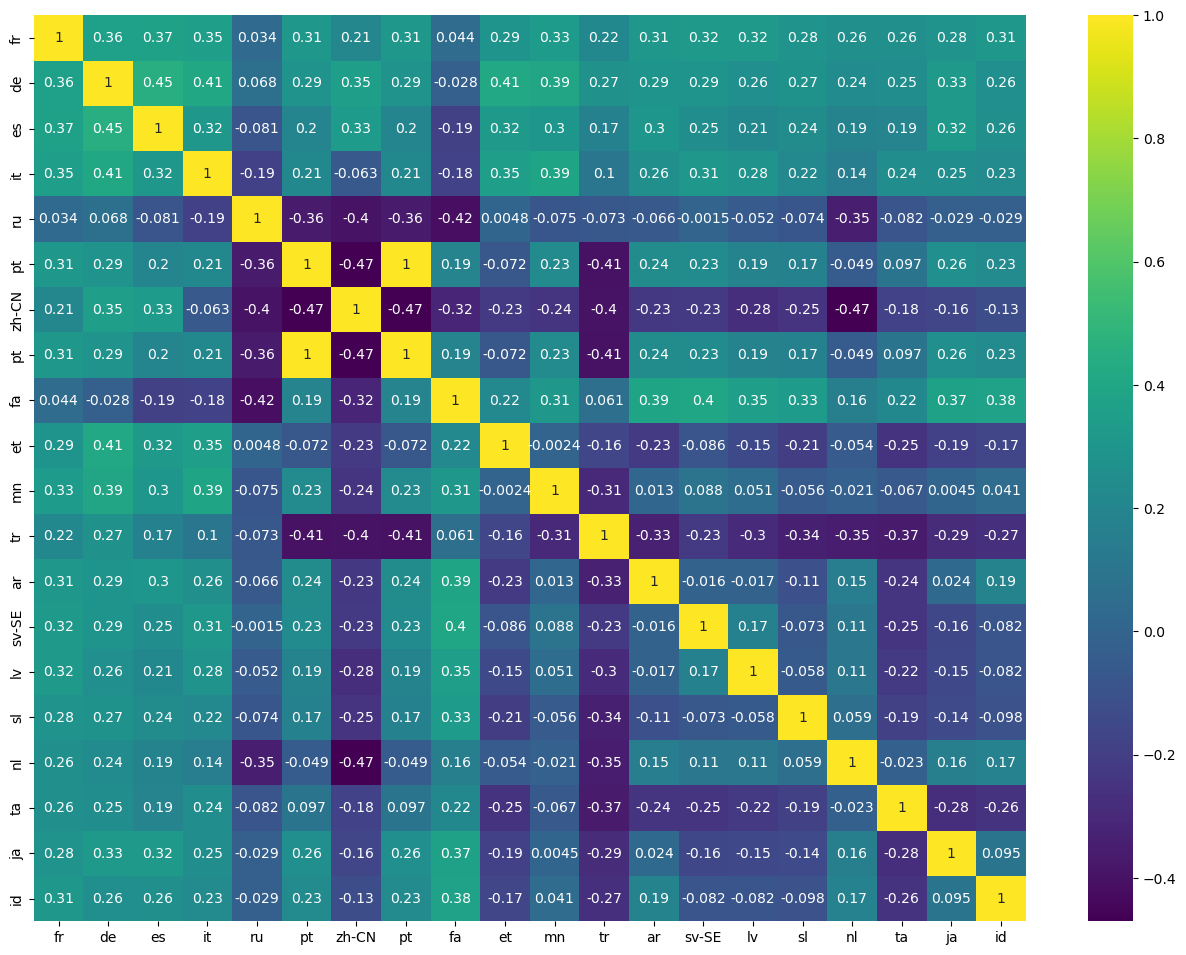

In [34]:
plt.figure(dpi=100, figsize=(16, 12))
sns.heatmap(spr_matrix, xticklabels=langs, yticklabels=langs, annot=True, cmap='viridis')

In [79]:
langs

['fr',
 'de',
 'es',
 'it',
 'ru',
 'pt',
 'zh-CN',
 'pt',
 'fa',
 'et',
 'mn',
 'nl',
 'tr',
 'ar',
 'sv-SE',
 'lv',
 'sl',
 'nl',
 'ta',
 'ja',
 'id']